#### Questions 1-5 are concerned with Value at Risk and Expected Shortfall. Assume that the tail probability of interest is 1%. The daily Amazon (AMZN) and Coca Cola (KO) prices from January 2, 2003 to April 30, 2015 can be downloaded from Yahoo via the quantmod package. Use the adjusted closing prices to compute the daily log returns. Assume that you hold both stocks valued at $1 million each.

#### 1- Consider the Amazon stock only.

A. Calculate the VaR of your position for the next trading day using the RiskMetrics method on April 30, 2015. Write down the model based on which you calculate VaR. What is the associated expected shortfall? Also, what is the VaR for the next 10 trading days? 

B. Build a GARCH(1,1) model for the log return series with Gaussian innovations. What is the VaR based on the fitted model for the next trading day? What is the corresponding expected shortfall? 

C. Build a GARCH(1,1) model with Student-t innovations for the log return series. What is the VaR for the next trading day based on the fitted model? What is the corresponding expected shortfall?

In [1]:
options(warn=-1)
 library(quantmod,quietly = TRUE)
 library(fGarch,quietly = TRUE)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")


Attaching package: 'fGarch'


The following object is masked from 'package:TTR':

    volatility




[1] "AMZN"

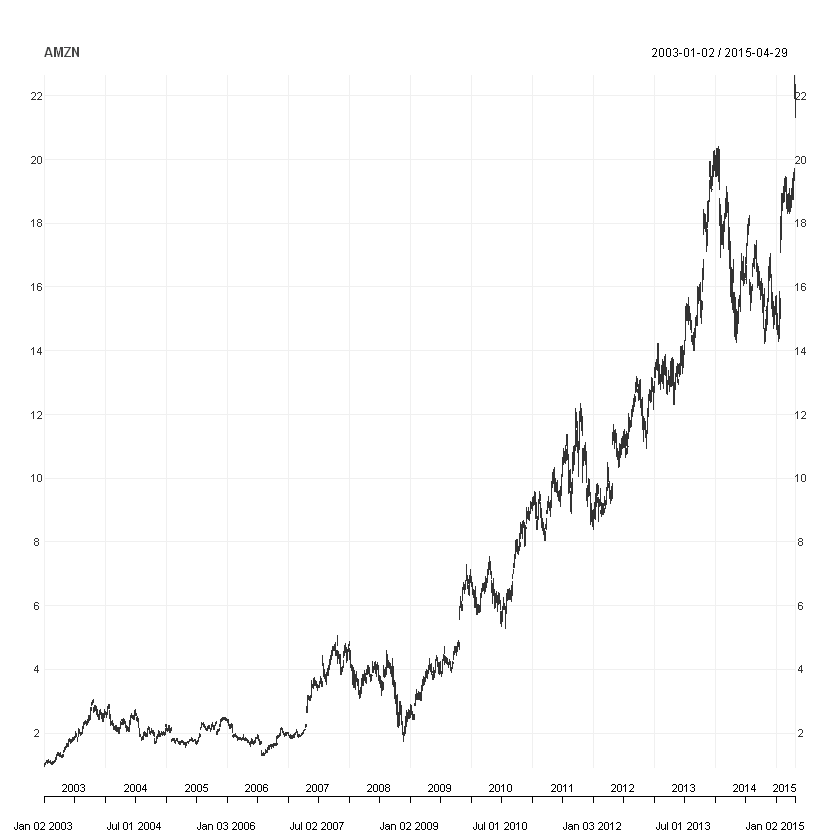

In [2]:
 getSymbols(Symbols = "AMZN", from = "2003-01-02", to = "2015-04-30")
 chart_Series(AMZN)

In [3]:
 head(AMZN)
 tail(AMZN)

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2003-01-02    0.9595    0.9840   0.9275     0.9785   129680000        0.9785
2003-01-03    0.9795    1.0265   0.9705     1.0260   175140000        1.0260
2003-01-06    1.0200    1.0585   1.0150     1.0350   153962000        1.0350
2003-01-07    1.0415    1.0875   1.0300     1.0775   191364000        1.0775
2003-01-08    1.0720    1.0800   1.0410     1.0510   139630000        1.0510
2003-01-09    1.0540    1.0850   1.0450     1.0725   123096000        1.0725

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2015-04-22   19.5955   19.7140  19.4000    19.4900    69494000       19.4900
2015-04-23   19.5105   19.5940  19.3075    19.4995   159600000       19.4995
2015-04-24   21.9500   22.6325  21.9500    22.2550   343538000       22.2550
2015-04-27   22.1930   22.3495  21.8705    21.9280   108618000       21.9280
2015-04-28   21.9255   21.9500  21.4020    21.4655    82810000       21.4655
2015-04-29   21.3375   21.7120  21.3015    21.4685    72434000       21.4685

#### Computing Daily Log Returns

In [4]:
amzn= diff(log(AMZN$AMZN.Adjusted))
amzn= c(amzn[-1,])
head(amzn)

           AMZN.Adjusted
2003-01-03   0.047402252
2003-01-06   0.008733625
2003-01-07   0.040242135
2003-01-08  -0.024901439
2003-01-09   0.020250272
2003-01-10  -0.006079051

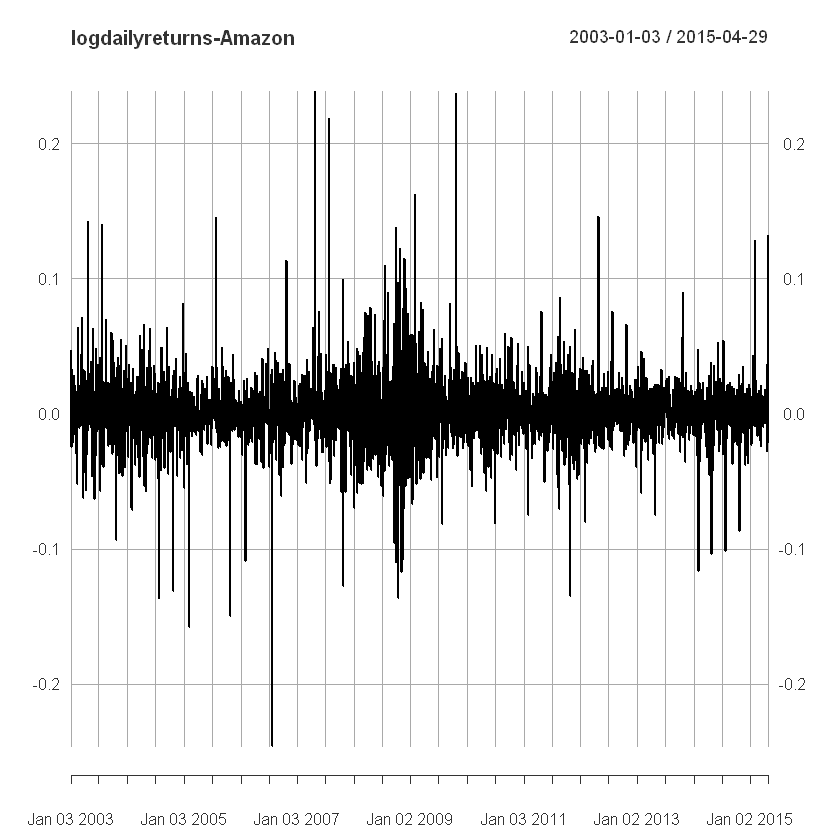

In [5]:
plot(amzn,main= "logdailyreturns-Amazon")

#### A.Calculate the VaR of your position for the next trading day using the RiskMetrics method on April 30,2015.

In [6]:
 namzn =as.vector(-amzn)
 head(namzn)

[1] -0.047402252 -0.008733625 -0.040242135  0.024901439 -0.020250272
[6]  0.006079051

In [7]:
source("RMfit.R")
length(namzn)

[1] 3101

In [8]:
m = RMfit(namzn)


Coefficient(s):
      Estimate  Std. Error  t value Pr(>|t|)
beta  0.999999         NaN      NaN      NaN

 Volatility prediction:
     Orig      Vpred
[1,] 3101 0.02656308

 Risk measure based on RiskMetrics:
      prob        VaR         ES
[1,] 0.950 0.04369238 0.05479201
[2,] 0.990 0.06179496 0.07079630
[3,] 0.999 0.08208609 0.08944028


 Tha VaR(at 99%) for next day comes out to be 0.06179. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million
 is 0.061794 * 1,000,000 = USD 61,794

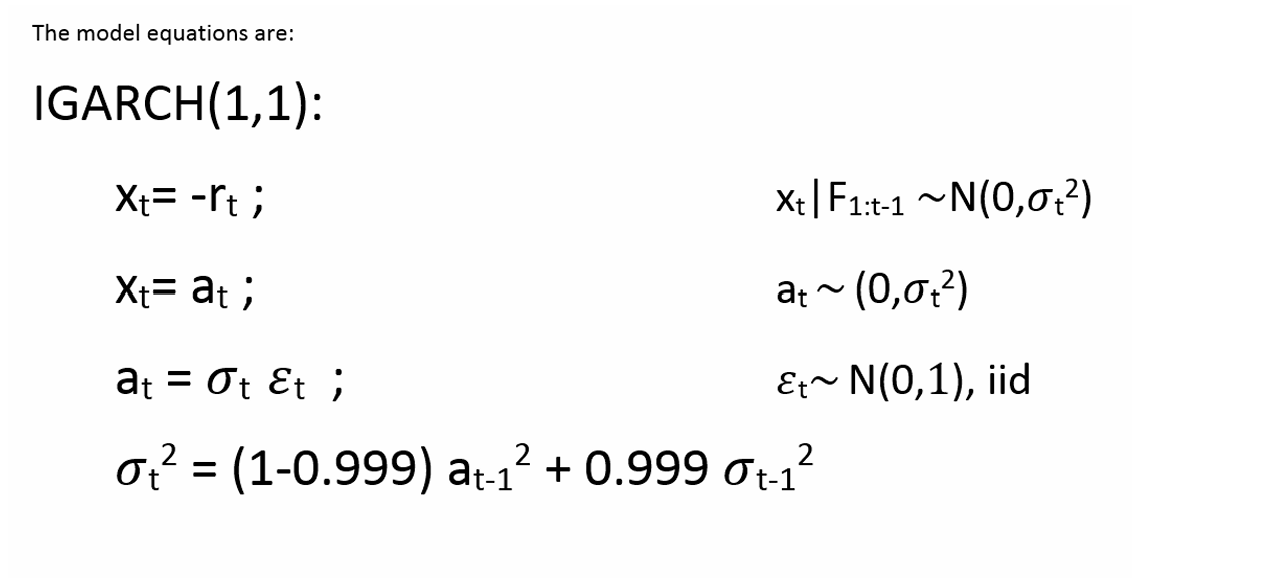

 The Expected Shortfall(at 99%) for next day comes out to be 0.07079630. This means the Expected Shortfall on position of Amazon Stocks worth USD 1 Million = 0.07079630 * 1,000,000 = USD 70,796

#### VaR for next 10 Days

In [9]:
vpred=sqrt(m$par[1]*(m$volatility[3101])^2+(1-m$par[1])*(namzn[3101])^2)
 vpred
 for (i in 1:10){
 v = sqrt(i)*vpred*qnorm(0.99)* 1000000
 print(paste("Var Day-",i,": ", v))
 }
 #sqrt(10)*vpred*qnorm(0.99)

beta 
0.02656308

[1] "Var Day- 1 :  61794.9649249259"
[1] "Var Day- 2 :  87391.2774832"
[1] "Var Day- 3 :  107032.018901908"
[1] "Var Day- 4 :  123589.929849852"
[1] "Var Day- 5 :  138177.74223935"
[1] "Var Day- 6 :  151366.132739252"
[1] "Var Day- 7 :  163494.109467313"
[1] "Var Day- 8 :  174782.5549664"
[1] "Var Day- 9 :  185384.894774778"
[1] "Var Day- 10 :  195412.837092982"


### Building a GARCH(1,1) model for the log return series with Gaussian innovations.

In [10]:
m1=garchFit(~garch(1,1),data=namzn,trace=F)
 m1@fit$par

mu         omega        alpha1         beta1 
-1.304319e-03  6.215141e-05  4.858320e-02  8.641474e-01

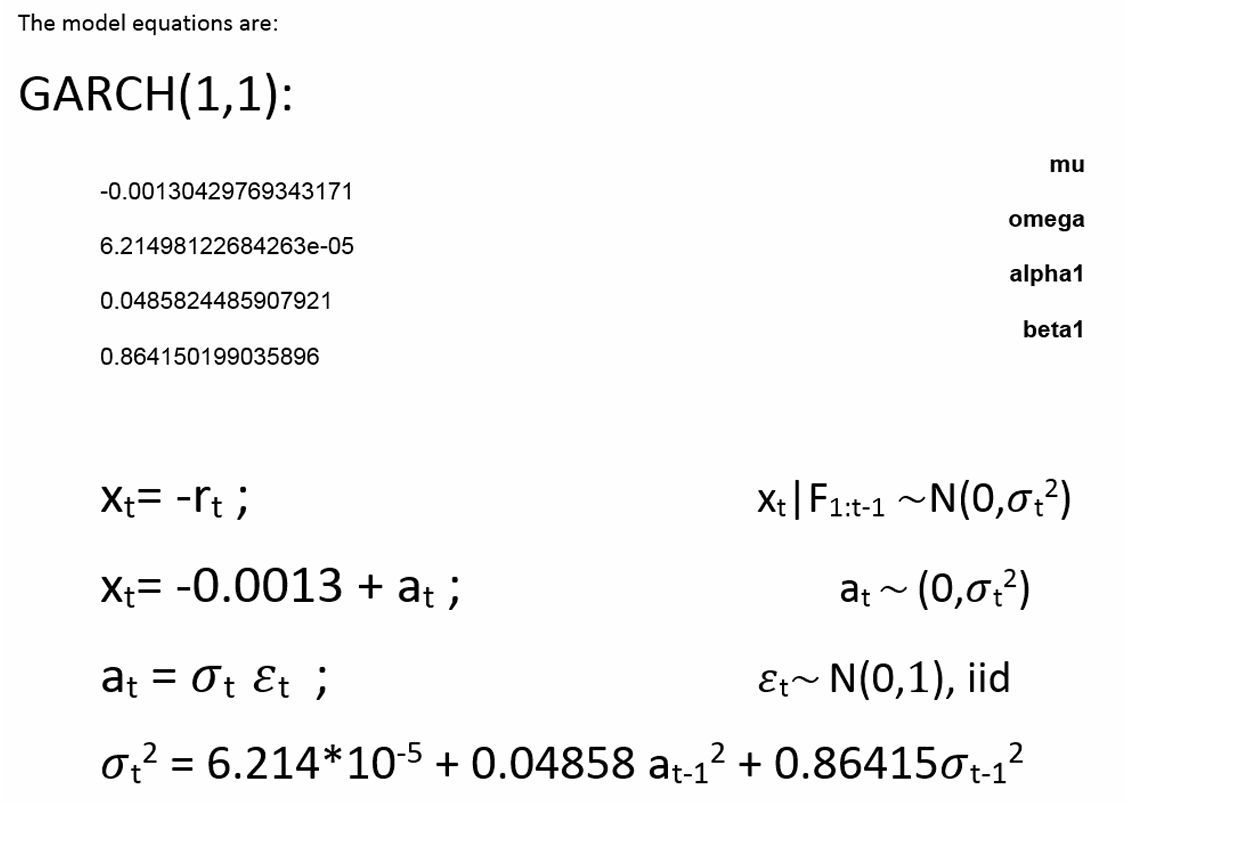

 #### VaR based on the fitted model for the next trading day

In [11]:
pm1=predict(m1,1)
 pm1

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
-0.001304319,0.03265396,0.03265396


In [12]:
 source("RMeasure.R")
 sigma=pm1[1,3]
 mu=pm1[1,1]
 RMeasure(mu,sigma)


 Risk Measures for selected probabilities: 
       prob        VaR         ES
[1,] 0.9500 0.05240666 0.06605142
[2,] 0.9900 0.07466015 0.08572547
[3,] 0.9990 0.09960400 0.10864450
[4,] 0.9999 0.12013629 0.12795571


 The VaR(at 99%) for next day comes out to be 0.07466001. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million
 is 0.07466001 * 1,000,000 = USD 74,660

The Expected Shortfall(at 99%) for next day comes out to be 0.08572532. This means the Expected Shortfall on position of Amazon Stocks worth USD 1 Million = 0.08572532 * 1,000,000 = USD 85,725

#### Building a GARCH(1,1) model with Student-t innovations for the log return series.

In [13]:
m2=garchFit(~garch(1,1),data=namzn,trace=F,cond.dist = "std")
m2@fit$par

mu         omega        alpha1         beta1         shape 
-6.461809e-04  3.092076e-06  1.518507e-02  9.792464e-01  3.686962e+00

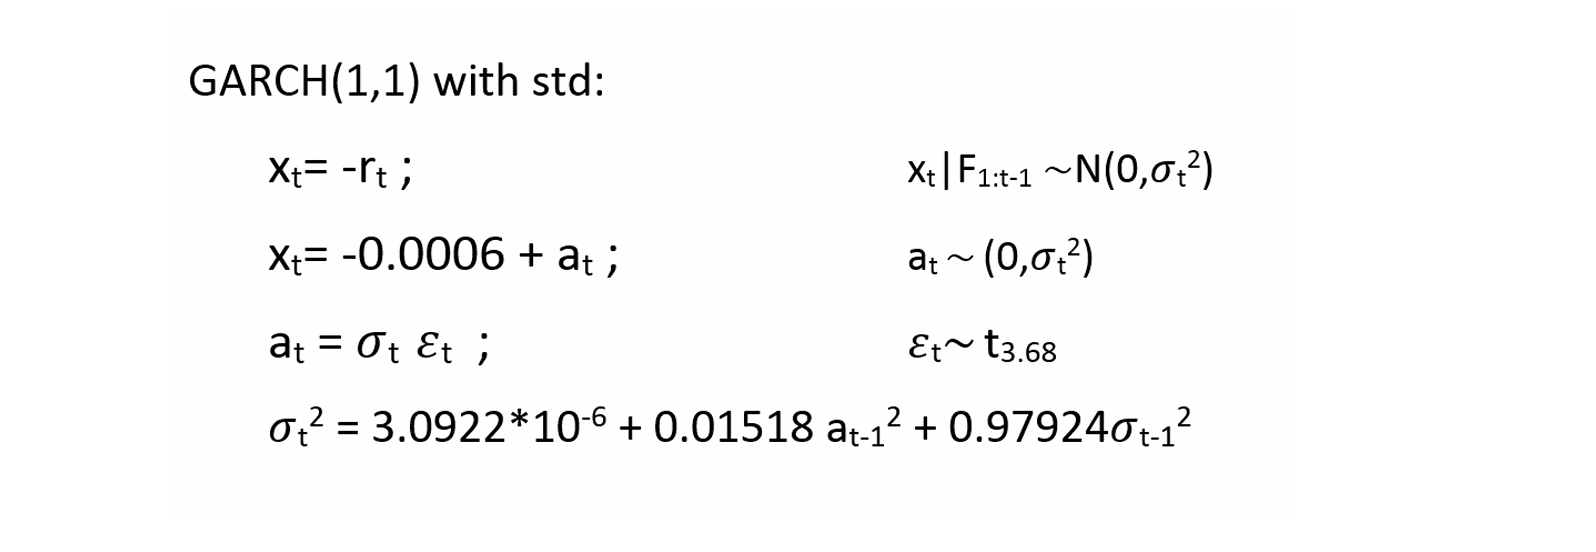

#### VaR for the next trading day based on the fitted model

In [14]:
 pm2=predict(m2,1)
 pm2

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
-0.0006461809,0.02474524,0.02474524


In [15]:
df=m2@fit$par[5]
 mu=pm2[1,1]
 sigma=pm2[1,3]
 RMeasure(mu,sigma,cond.dist="std",df=df)


 Risk Measures for selected probabilities: 
       prob        VaR         ES
[1,] 0.9500 0.03592574 0.05549567
[2,] 0.9900 0.06511806 0.09320731
[3,] 0.9990 0.13035032 0.18098168
[4,] 0.9999 0.24823956 0.34186462


Tha VaR(at 99%) for next day comes out to be 0.0651182. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million is 0.0651182 * 1,000,000 = USD 65,118

The Expected Shortfall(at 99%) for next day comes out to be 0.0932075. This means the Expected  Shortfall on position of Amazon Stocks  worth USD 1 Million = 0.0932075 * 1,000,000 = USD 93,207

#### 2- Again, consider the daily log-returns of Amazon stock. The goal here is to use EVT to estimate risk. Using blocks of size 21, fit a generalized extreme value distribution to a proper return series. Write down the estimates and their standard errors.  How can you compute the 1% VaR? (Formula). Compute the 1% VaR of your financial position based on the fitted parameters. What is the 1% VaR of your financial position for the next 10 trading days?

In [17]:
options(warn=-1)
library(quantmod,quietly = TRUE)
library(evir,quietly = TRUE)
 #library(fGarch,quietly = TRUE)

In [18]:
getSymbols(Symbols = "AMZN", from = "2003-01-02", to = "2015-04-30")

[1] "AMZN"

In [19]:
 amzn= diff(log(AMZN$AMZN.Adjusted))
 amzn= c(amzn[-1,])
 head(amzn)

           AMZN.Adjusted
2003-01-03   0.047402252
2003-01-06   0.008733625
2003-01-07   0.040242135
2003-01-08  -0.024901439
2003-01-09   0.020250272
2003-01-10  -0.006079051

In [20]:
 namzn =as.vector(-amzn)
 head(namzn)
 length(namzn)

[1] -0.047402252 -0.008733625 -0.040242135  0.024901439 -0.020250272
[6]  0.006079051

[1] 3101

Using blocks of size 21,fit a generalized extreme value distribution to a proper return series.

In [21]:
require(evir)
 m=gev(namzn*100,block=21)#Multipyingby100toscaleupthelossfunction
 m

$n.all
[1] 3101

$n
[1] 148

$data
  [1]  2.4901439  5.1965988  6.2797616  5.6626180  4.6131123  6.3038147
  [7]  5.7158448  2.5026794  3.0222393  9.3912686  4.3849394  4.5910965
 [13]  7.1482021  3.8247788  4.6631321  5.7706134  2.9164830  3.4408782
 [19] 13.6341323  4.1529351  4.5123985 13.1687203  4.6130874  3.3211947
 [25]  5.4941096 15.8258152  1.5564530  3.0733438  2.2778767  2.3164793
 [31]  1.1670280  2.5803638  2.0799686 14.9720442  1.3197625  1.7658570
 [37]  3.0844702 10.8902424  2.1441192  3.7570545  4.0452446  3.9624860
 [43] 24.6181553  3.4588593  6.0974874  2.3031313  3.7477394  2.0255189
 [49]  3.4436260  5.1447785  2.5839876  3.8860219  3.1189381  2.8670308
 [55]  5.1611597  4.8333867  1.9798061 12.7738660  5.7749764  6.9810970
 [61]  5.9184238  5.2122719  4.1499757  4.1722646  3.3988128  5.3708402
 [67]  6.0849570  3.8822700 10.9770684 13.6758886 11.7312632  4.7961193
 [73]  6.6859151  5.2311596  4.3970735  3.3044529  4.9181626  4.7013725
 [79]  8.1882036  3.0614619  

#### Writing down the estimates and their standard errors.

In [22]:
m$par.ests #Estimates
m$par.ses #Standard Errors

xi     sigma        mu 
0.3145592 1.6472438 3.0758701

xi      sigma         mu 
0.07246389 0.13088202 0.15396466

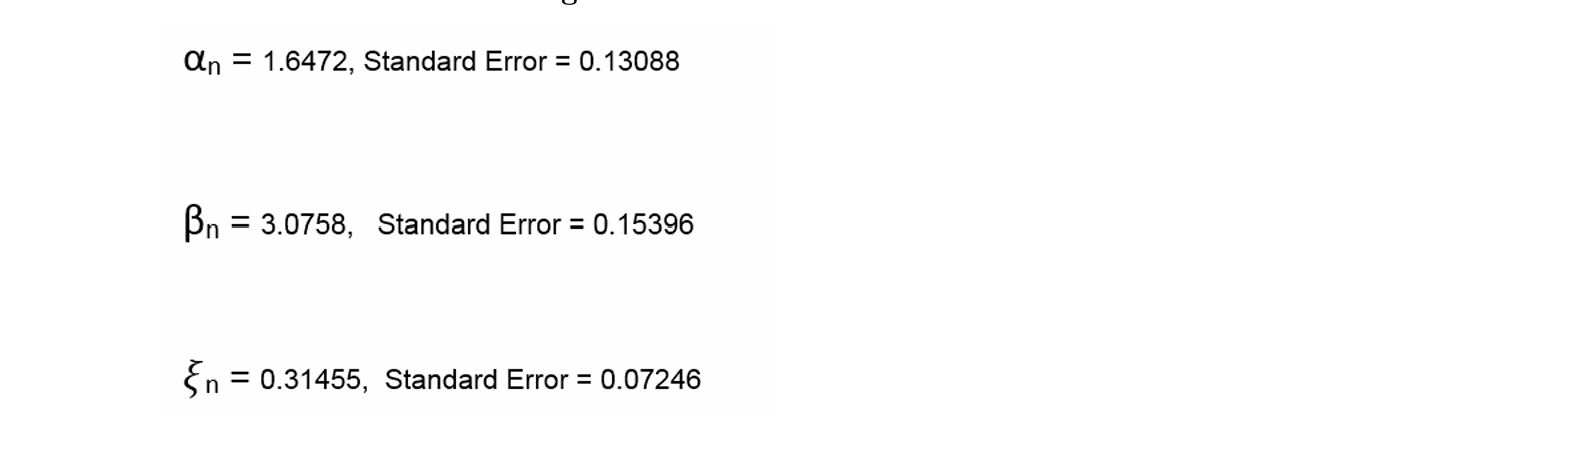

#### To compute 1% VaR (Formula)

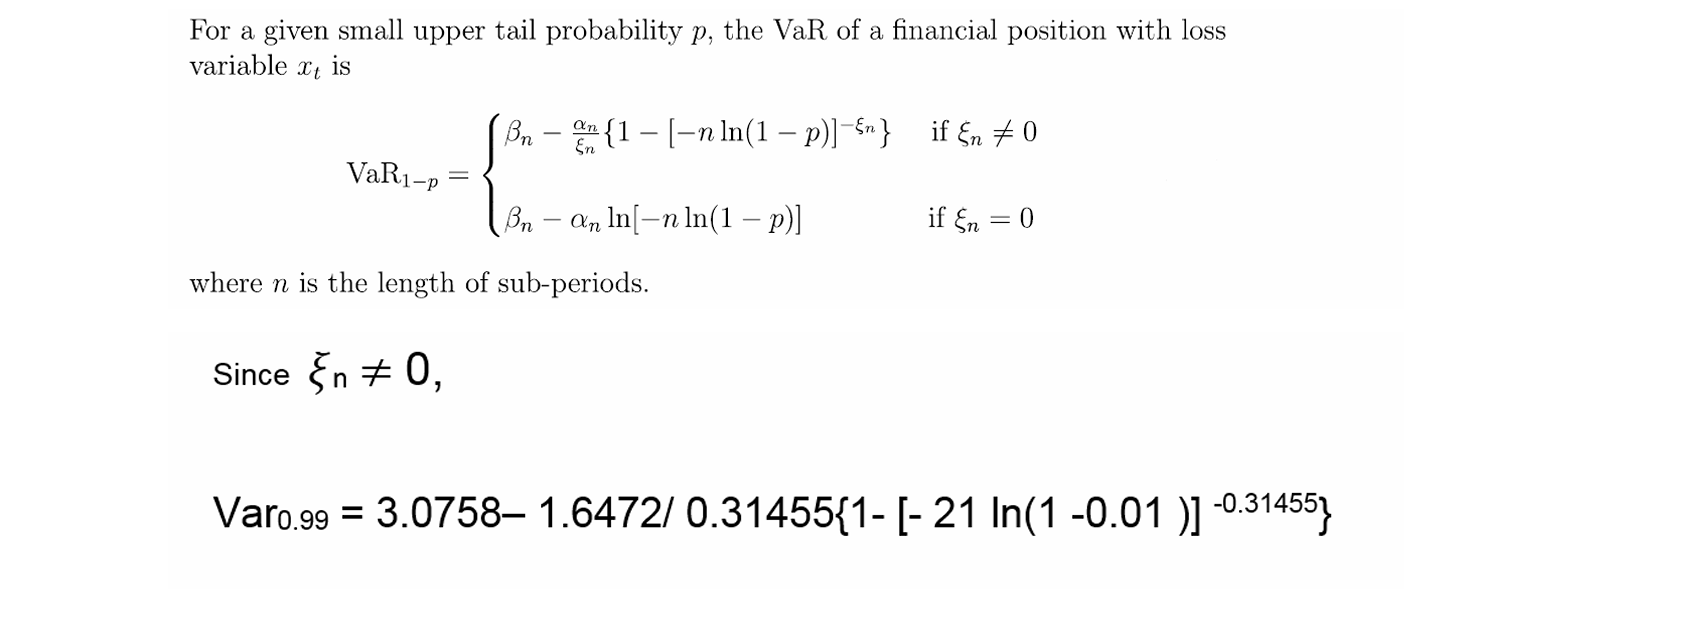

In [23]:
source("evtVaR.R")
 evtVaR(m$par.ests[1],m$par.ests[2],m$par.ests[3],21,0.01)

      mu 
6.381436 


Tha VaR(at 99%) for next day comes out to be 6.381436/100 = 0.063814 . This means the Value at Risk on position of Amazon Stocks worth USD 1 Million is 0.063814 * 1,000,000 = USD 63,814

#### Multi-period VaR under EVT

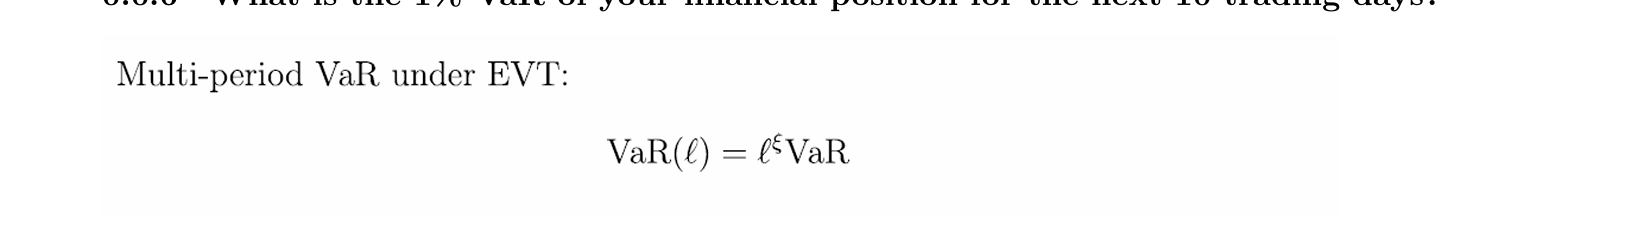


In [24]:
(10^(m$par.ests[1]))*0.063814

xi 
0.1316665

 The 1% VaR of financial position for next 10 days = 0.131666 * 1000000 = USD 131,666

#### 3- Again, consider the log returns of the Amazon stock. Fit a generalized Pareto distribution to the return series with threshold 3.5%. Based on the fitted model, what is the 1% VaR of your position? What is the associated expected shortfall? Repeat the analysis using threshold 4.5%. Are the results sensitive to the choice of thresholds?

In [25]:
options(warn=-1)
 library(quantmod,quietly = TRUE)
 library(evir,quietly = TRUE)
 #library(fGarch,quietly = TRUE)

In [26]:
getSymbols(Symbols = "AMZN", from = "2003-01-02", to = "2015-04-30")
 amzn= diff(log(AMZN$AMZN.Adjusted))
 amzn= c(amzn[-1,])
 head(amzn)

[1] "AMZN"

           AMZN.Adjusted
2003-01-03   0.047402252
2003-01-06   0.008733625
2003-01-07   0.040242135
2003-01-08  -0.024901439
2003-01-09   0.020250272
2003-01-10  -0.006079051

In [27]:
 namzn =as.vector(-amzn)
 head(namzn)
 length(namzn)

[1] -0.047402252 -0.008733625 -0.040242135  0.024901439 -0.020250272
[6]  0.006079051

[1] 3101

#### Fitting a generalized Pareto distribution to the return series with threshold 3.5%.

In [28]:
m=gpd(namzn,0.035) # eta=0.035
 m

$n
[1] 3101

$data
  [1] 0.05196599 0.06279762 0.04323169 0.05662618 0.04613112 0.06303815
  [7] 0.05715845 0.03676087 0.03759210 0.03943213 0.09391269 0.04384939
 [13] 0.04382988 0.04066315 0.03763339 0.04591096 0.03956015 0.07022379
 [19] 0.05417418 0.04318089 0.07148202 0.03824779 0.04663132 0.04138820
 [25] 0.05403310 0.05770613 0.04861994 0.13634132 0.04152935 0.04066534
 [31] 0.04512399 0.13168720 0.04613087 0.05494110 0.03707557 0.15825815
 [37] 0.14972044 0.10890242 0.03757054 0.03756179 0.03573474 0.04045245
 [43] 0.03722044 0.03962486 0.24618155 0.04538305 0.03535801 0.06097487
 [49] 0.03969405 0.03747739 0.05144778 0.03886022 0.03532527 0.05161160
 [55] 0.03719046 0.04833387 0.05784216 0.12773866 0.04056360 0.05774976
 [61] 0.03659211 0.04582534 0.06981097 0.03847092 0.05918424 0.04031271
 [67] 0.05122761 0.03818694 0.05212272 0.04354783 0.05109936 0.03523419
 [73] 0.04149976 0.03837242 0.03869164 0.04172265 0.04699914 0.03822430
 [79] 0.05370840 0.06084957 0.04234858 0.0388

In [29]:
 m$par.ests

xi       beta 
0.34251404 0.01548917

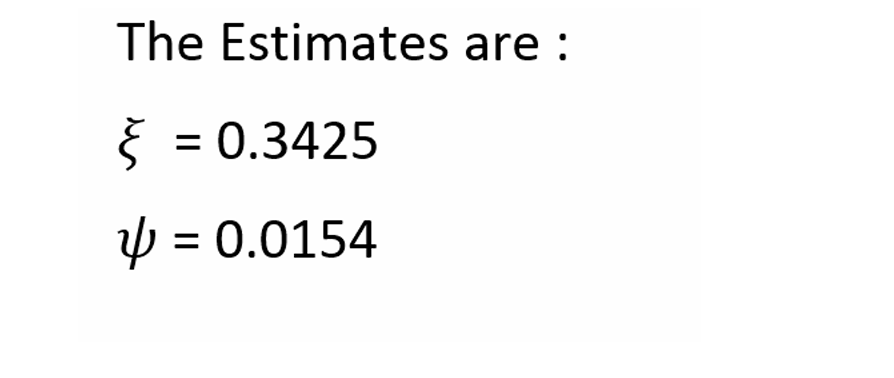

#### Model Checking

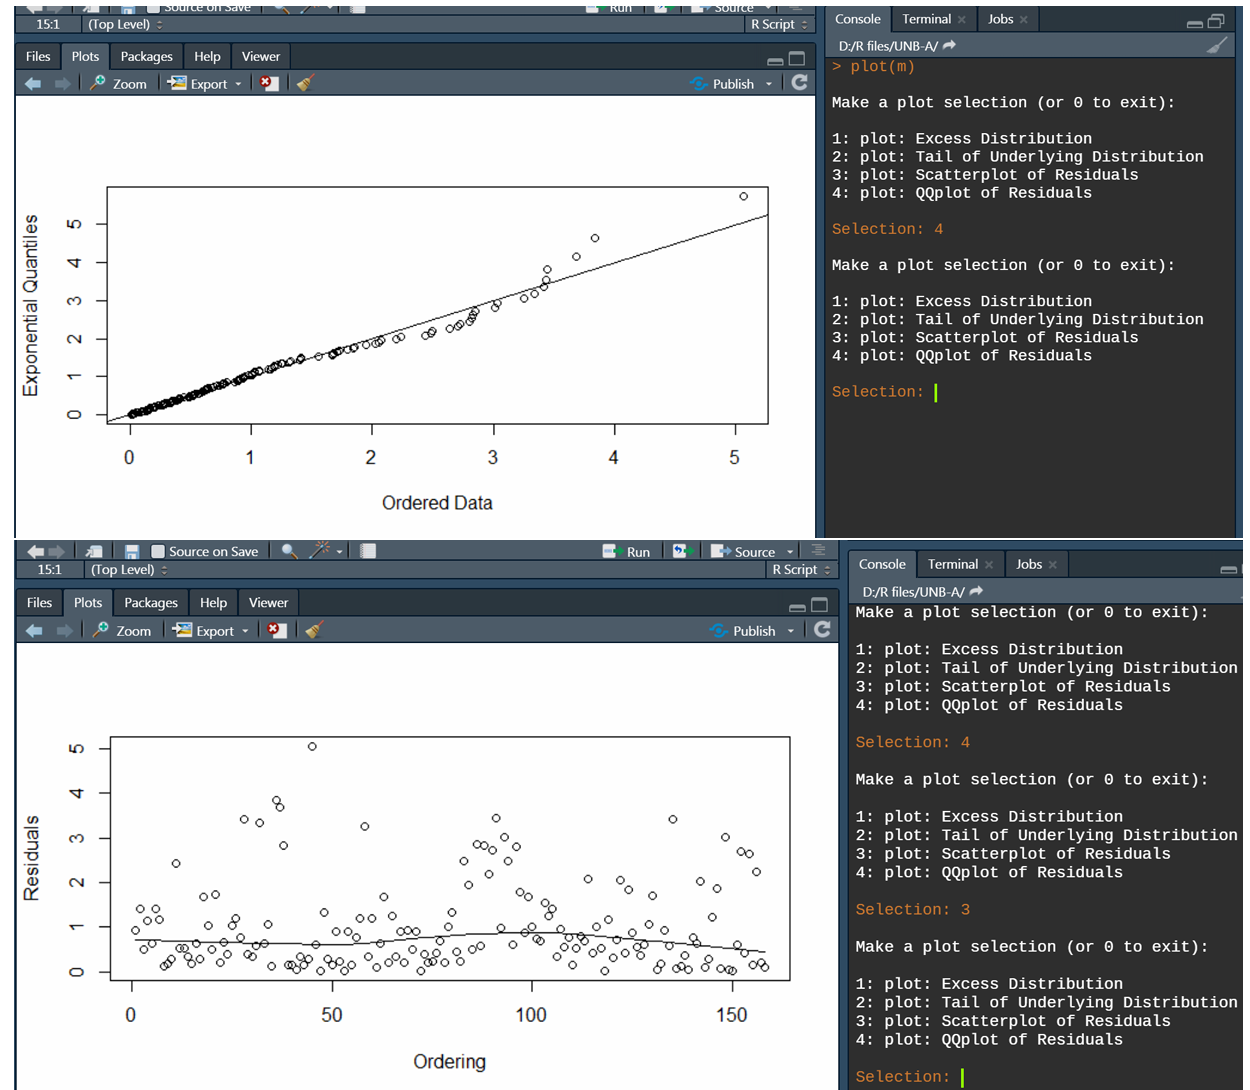

In [30]:
 riskmeasures(m,c(0.99))

p,quantile,sfall
0.99,0.06876586,0.1099142


 The 1% VaR comes out to be 0.068765. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million  is 0.068765 * 1,000,000 = USD 68,765

The expected shortfall comes out to be 0.109914. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million is 0.109914 * 1,000,000 = USD 109,914

#### Repeating the analysis using threshold 4.5%.

In [31]:
 n = gpd(namzn,0.045) # eta=0.045
 n

$n
[1] 3101

$data
 [1] 0.05196599 0.06279762 0.05662618 0.04613112 0.06303815 0.05715845
 [7] 0.09391269 0.04591096 0.07022379 0.05417418 0.07148202 0.04663132
[13] 0.05403310 0.05770613 0.04861994 0.13634132 0.04512399 0.13168720
[19] 0.04613087 0.05494110 0.15825815 0.14972044 0.10890242 0.24618155
[25] 0.04538305 0.06097487 0.05144778 0.05161160 0.04833387 0.05784216
[31] 0.12773866 0.05774976 0.04582534 0.06981097 0.05918424 0.05122761
[37] 0.05212272 0.05109936 0.04699914 0.05370840 0.06084957 0.09576759
[43] 0.07789485 0.10977068 0.10855083 0.08585004 0.10460838 0.13675889
[49] 0.05311329 0.11731263 0.09604146 0.04559677 0.10800379 0.07340623
[55] 0.05060020 0.07003399 0.05363797 0.04796119 0.04705353 0.06685915
[61] 0.05925287 0.06300195 0.05231160 0.04872070 0.04918163 0.04701373
[67] 0.08188204 0.05355793 0.05732527 0.04763752 0.08122476 0.07489645
[73] 0.05088809 0.04541646 0.05492090 0.07089767 0.05196687 0.04502006
[79] 0.13532540 0.04870833 0.04579506 0.08017135 0.0585189

In [32]:
 n$par.ests

xi       beta 
0.36775481 0.01821457

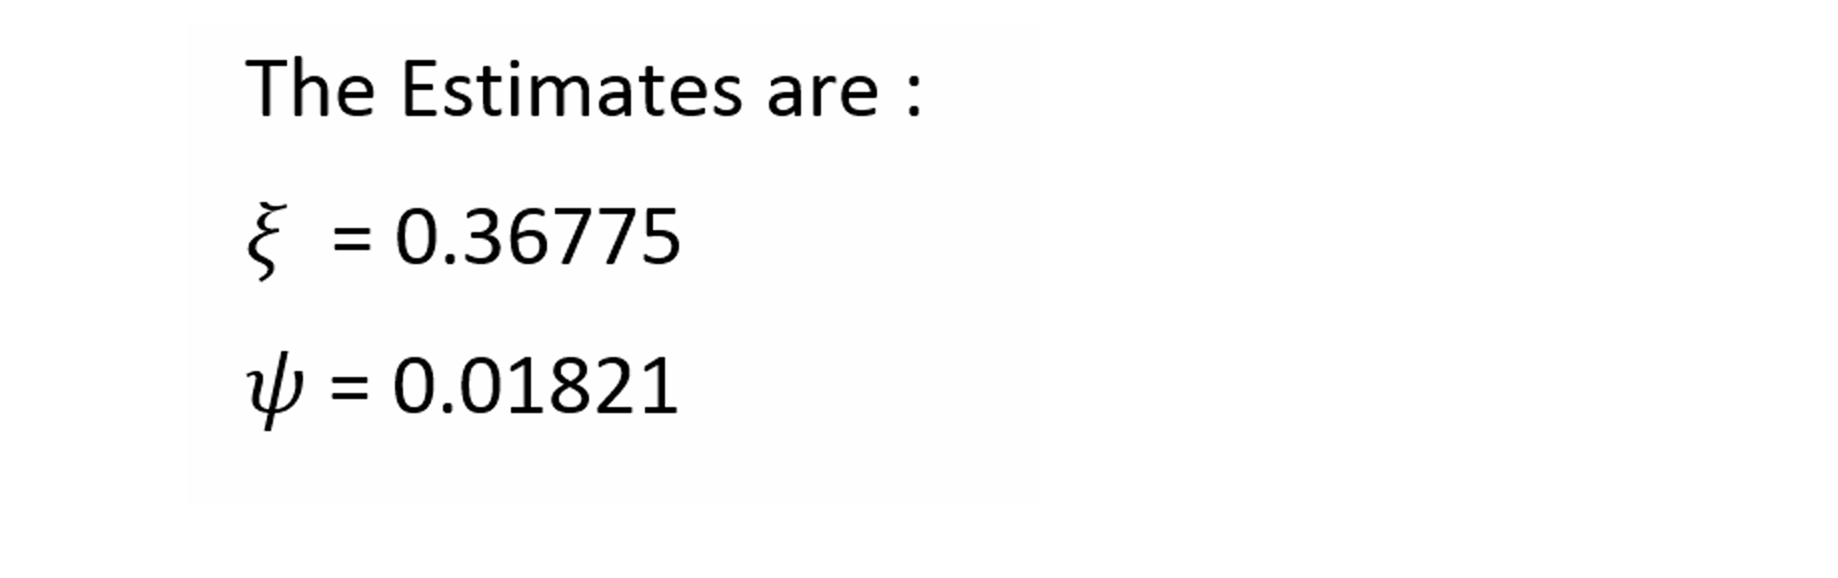

#### Model Checking

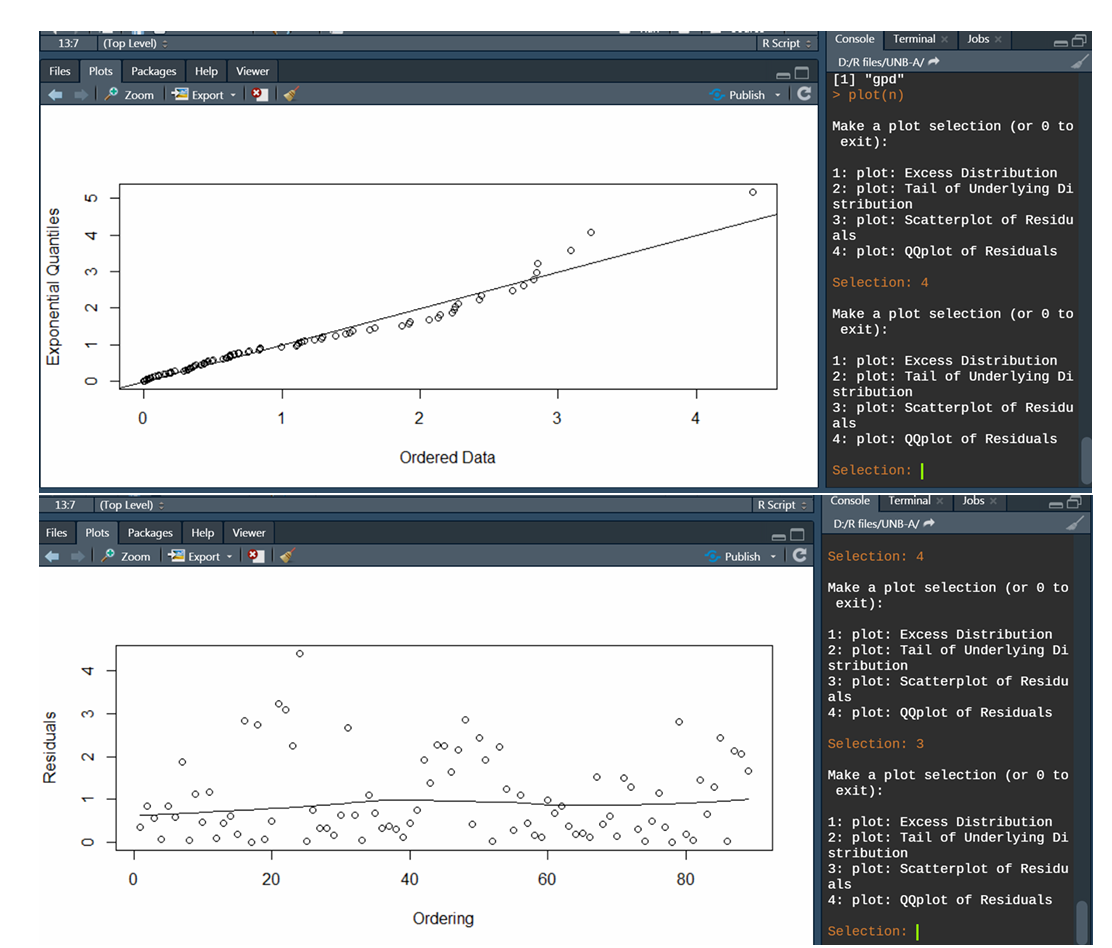

In [33]:
 riskmeasures(n,c(0.99))

p,quantile,sfall
0.99,0.06845884,0.1109134


The 1% VaR comes out to be 0.068458. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million is 0.068458 * 1,000,000 = USD 68,458.

The expected shortfall comes out to be 0.1109134. This means the Value at Risk on position of Amazon Stocks worth USD 1 Million is 0.1109134 * 1,000,000 = USD 110,913.

In [34]:
riskmeasures(m,c(0.99))
 riskmeasures(n,c(0.99))

p,quantile,sfall
0.99,0.06876586,0.1099142


p,quantile,sfall
0.99,0.06845884,0.1109134


 Although , results are some what similar. But, yes we can say that results are sensitive to choices of thresholds. This can be observed from the formula also.

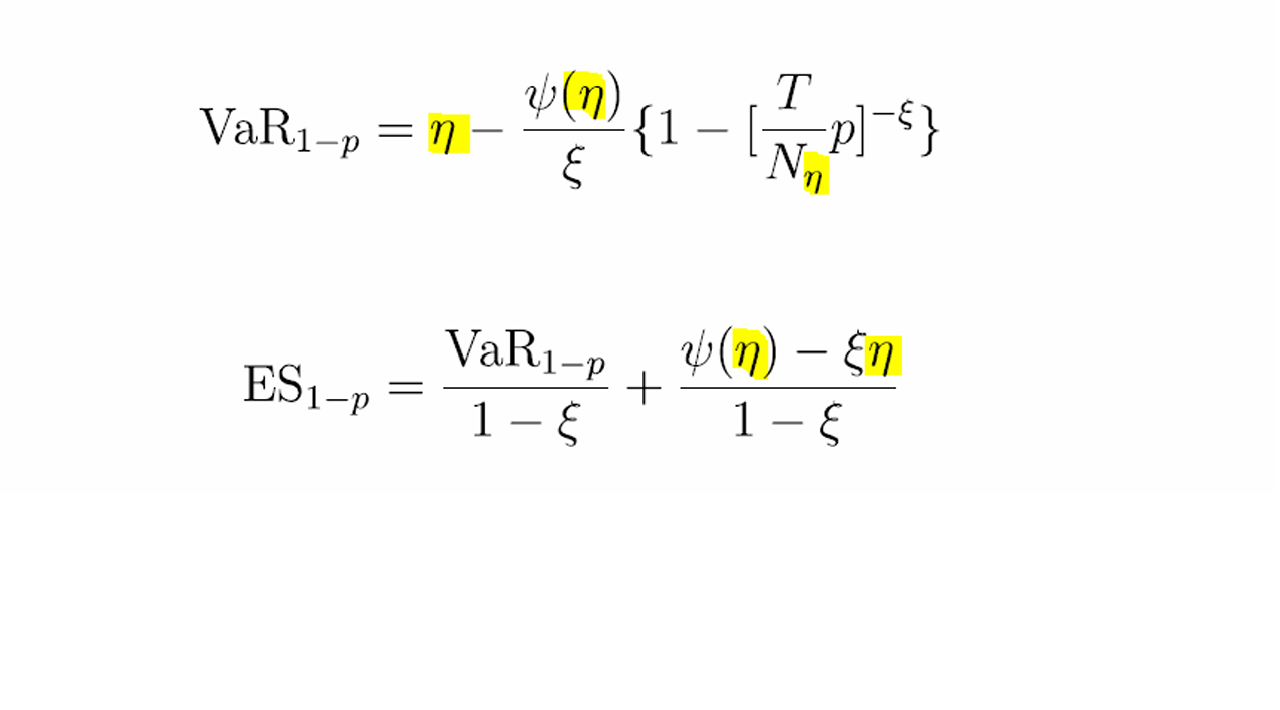

#### 4- Consider the log returns of KO stock. 

A. Calculate the VaR using the RiskMetrics method for the next trading day on April 30, 2015. 

B. What is the VaR for the combined position of AMZN and KO stocks for the next trading day on April 30, 2015? (Using RiskMetrics method) 

C. Consider a new portfolio that holds a short position of $1 million in AMZN stock, but a long position of $1 million in KO stock. Obtain the VaR of the portfolio for the next trading day on April 30, 2015 if (a) RiskMetrics is used and (b) GARCH(1,1) models with standardized Student-t innovations are used. 

D. What is the VaR for the combined position of AMZN and KO (both long), for the next trading day on April 30, 2015, if we entertain time-varying correlations between the two stocks.

In [35]:
 options(warn=-1)
 library(quantmod,quietly = TRUE)
 library(evir,quietly = TRUE)
 library(fGarch,quietly = TRUE)

[1] "KO"

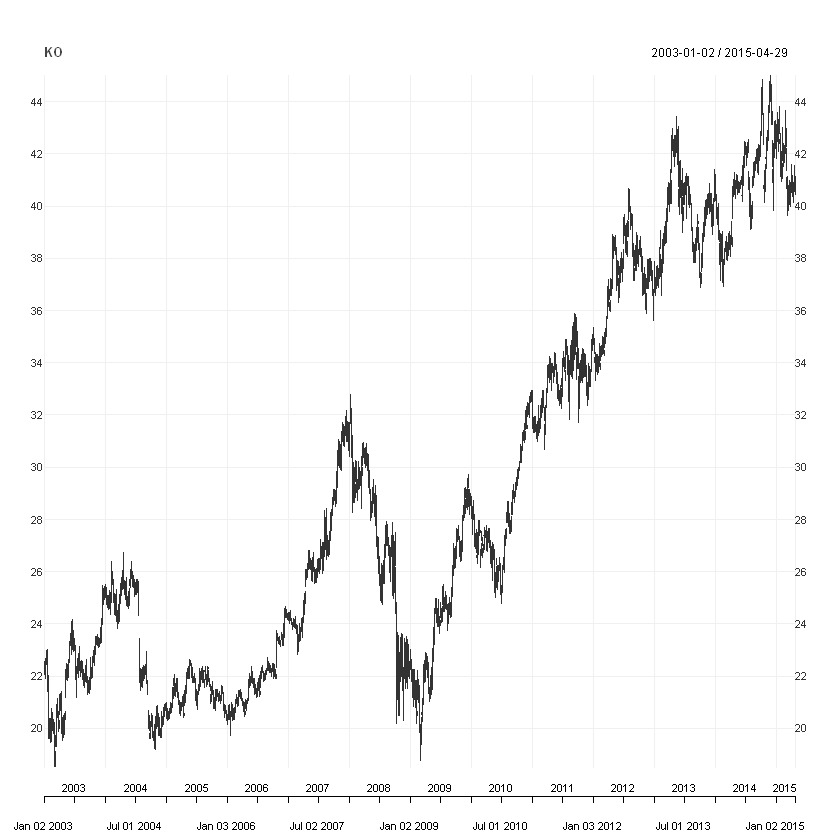

In [36]:
getSymbols(Symbols = "KO", from = "2003-01-02", to = "2015-04-30")
 chart_Series(KO)

In [37]:
ko =diff(log(KO$KO.Adjusted))
 ko =c(ko[-1,])
 head(ko)

            KO.Adjusted
2003-01-03 -0.002454992
2003-01-06  0.004014195
2003-01-07 -0.012544147
2003-01-08 -0.006559417
2003-01-09  0.010383816
2003-01-10  0.014933917

In [38]:
nko= as.vector(-ko)
 head(nko)
 length(nko)

[1]  0.002454992 -0.004014195  0.012544147  0.006559417 -0.010383816
[6] -0.014933917

[1] 3101

#### Calculating the VaR using the RiskMetrics method for the next trading day on April 30,2015.

In [39]:
 source("RMfit.R")
 m1 =RMfit(nko)


Coefficient(s):
       Estimate  Std. Error  t value   Pr(>|t|)    
beta 0.95448393  0.00556478  171.522 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Volatility prediction:
     Orig      Vpred
[1,] 3101 0.00794634

 Risk measure based on RiskMetrics:
      prob        VaR         ES
[1,] 0.950 0.01307057 0.01639102
[2,] 0.990 0.01848595 0.02117870
[3,] 0.999 0.02455604 0.02675604


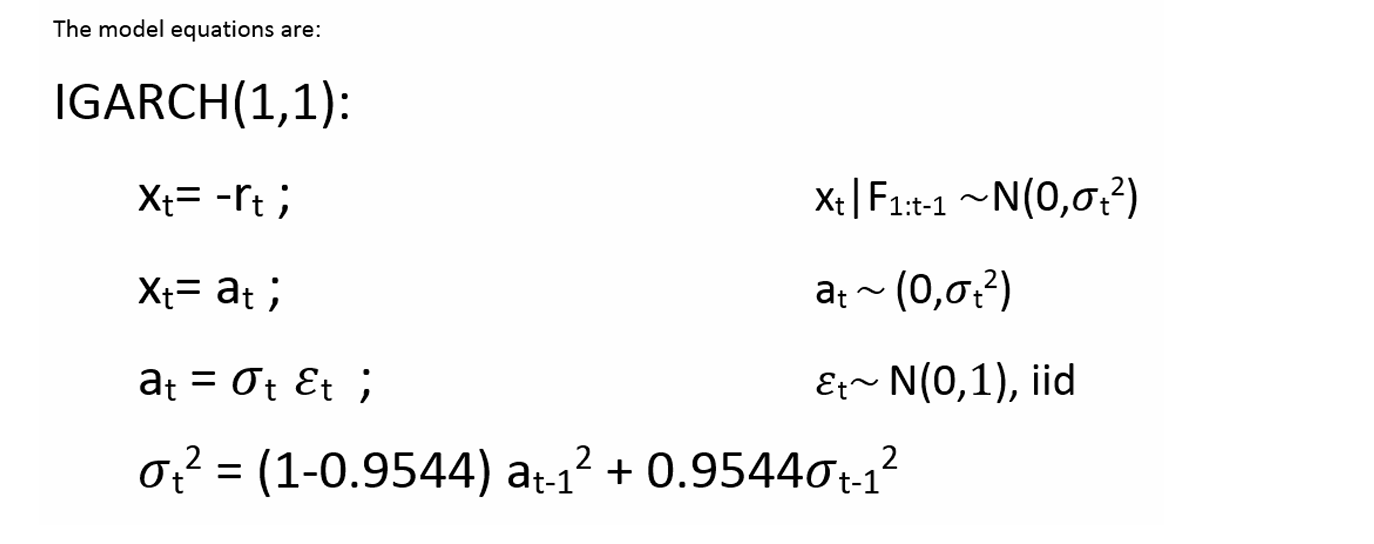

 The VaR(at 99%) for 30-Aril-2015 comes out to be 0.01848578. This means the Value at Risk on position of Coca-Cola Stocks worth USD 1 Million is 0.01848578 * 1,000,000 = USD 18,485

#### VaR for the combined position of AMZN and KO stocks for the next trading day on April 30, 2015? (Using RiskMetrics method)

In [40]:
getSymbols(Symbols = "AMZN", from = "2003-01-02", to = "2015-04-30")
 getSymbols(Symbols = "KO", from = "2003-01-02", to = "2015-04-30")

[1] "AMZN"

[1] "KO"

In [41]:
 amzn = diff(log(AMZN$AMZN.Adjusted))
 ko = diff(log(KO$KO.Adjusted))
 amzn = c(amzn[-1,])
 ko = c(ko[-1,])
 namzn = as.vector(-amzn)
 nko = as.vector(-ko)

In [42]:
nak= namzn+ nko
 head(nak) #Adding the loss functions of Amazon & Coca-Cola

[1] -0.044946764 -0.012748893 -0.027696993  0.031460021 -0.030633504
[6] -0.008855197

In [43]:
 m2 =RMfit(nak)


Coefficient(s):
       Estimate  Std. Error  t value   Pr(>|t|)    
beta 0.98794664  0.00138695  712.315 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Volatility prediction:
     Orig      Vpred
[1,] 3101 0.02597967

 Risk measure based on RiskMetrics:
      prob        VaR         ES
[1,] 0.950 0.04273275 0.05358860
[2,] 0.990 0.06043775 0.06924139
[3,] 0.999 0.08028322 0.08747589


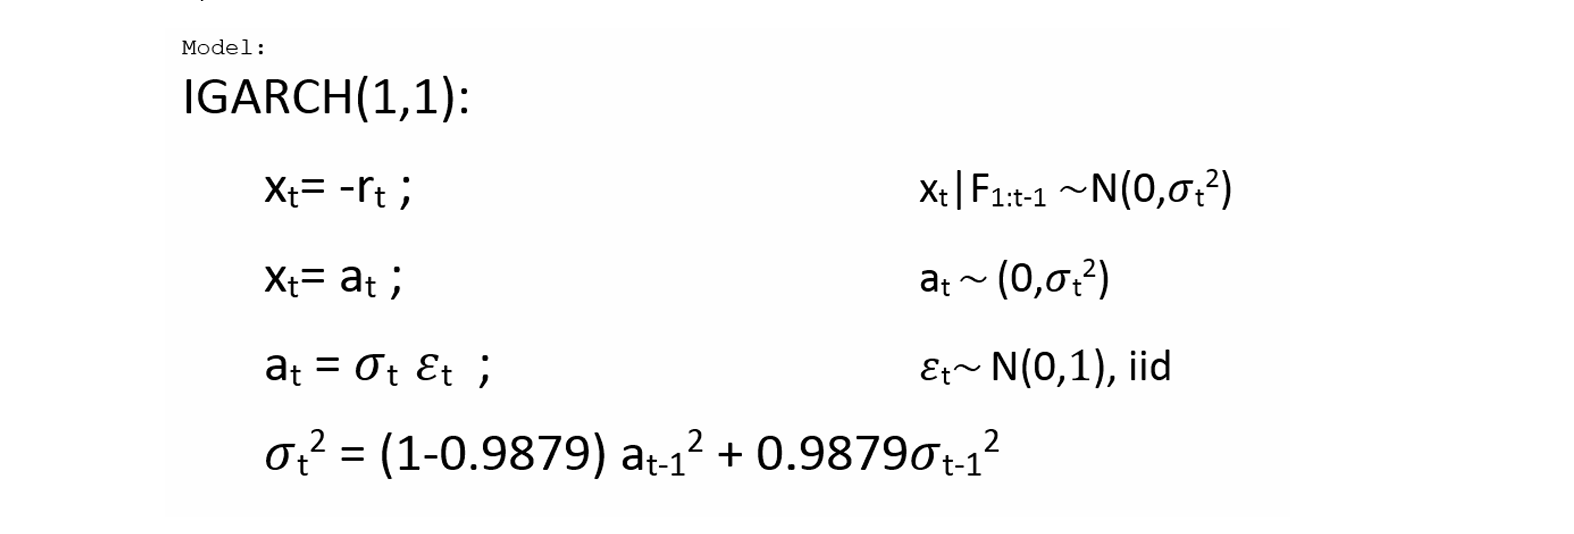

Tha VaR(at99%) after considering Amazon & Coca-Cola(equal-weighted) for next day comes out to be 0.06043774.This means the Value at Risk on position of Amazon + Coca-Cola Stocks worth USD 1 Million in total is 0.06043774 * 1,000,000 = USD 60,437

#### Considering a new portfolio that holds a short position of USD 1 million in AMZN stock,but a long position of USD 1 million in KO stock.

In [44]:
 getSymbols(Symbols= "AMZN",from = "2003-01-02",to= "2015-04-30")
 getSymbols(Symbols= "KO",from ="2003-01-02",to ="2015-04-30")

[1] "AMZN"

[1] "KO"

In [45]:
 amzn= diff(log(AMZN$AMZN.Adjusted))
 ko =diff(log(KO$KO.Adjusted))
 amzn= c(amzn[-1,])
 ko =c(ko[-1,])
 amzn= as.vector(amzn) #ShortonAmazon
 nko= as.vector(-ko) #LongonCoca-Cola

In [46]:
 combined= amzn+ nko #Adding profit function of Amazon & loss function of Coca-Cola.
 head(combined)

[1]  0.049857824  0.004718027  0.052786861 -0.018341937  0.009866204
[6] -0.021013050

In [47]:
 m3 =RMfit(combined)


Coefficient(s):
      Estimate  Std. Error  t value Pr(>|t|)
beta  0.999999         NaN      NaN      NaN

 Volatility prediction:
     Orig      Vpred
[1,] 3101 0.02554039

 Risk measure based on RiskMetrics:
      prob        VaR         ES
[1,] 0.950 0.04201020 0.05268248
[2,] 0.990 0.05941582 0.06807060
[3,] 0.999 0.07892573 0.08599678


 Tha VaR(at 99%) after considering short on Amazon & long on Coca-Cola (USD 1 Million each) for next day comes out to be 0.05941582 . This means the Value at Risk on position of Amazon + Coca-Cola Stocks worth USD 2 Million in total is 0.05941582 * 2,000,000 = USD 118,831

#### Obtaining the VaR of the portfolio for the next trading day on April 30, 2015 if GARCH(1,1) models with standardized Student-t innovations are used.

In [48]:
 t.test(combined)
 m4 = garchFit(~garch(1,1),data=combined,cond.dist = "std",trace=F)
 m4@fit$par


	One Sample t-test

data:  combined
t = 1.5189, df = 3100, p-value = 0.1289
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0002025802  0.0015955985
sample estimates:
   mean of x 
0.0006965092 


mu        omega       alpha1        beta1        shape 
3.972363e-04 5.335710e-07 7.408671e-03 9.909368e-01 3.776966e+00

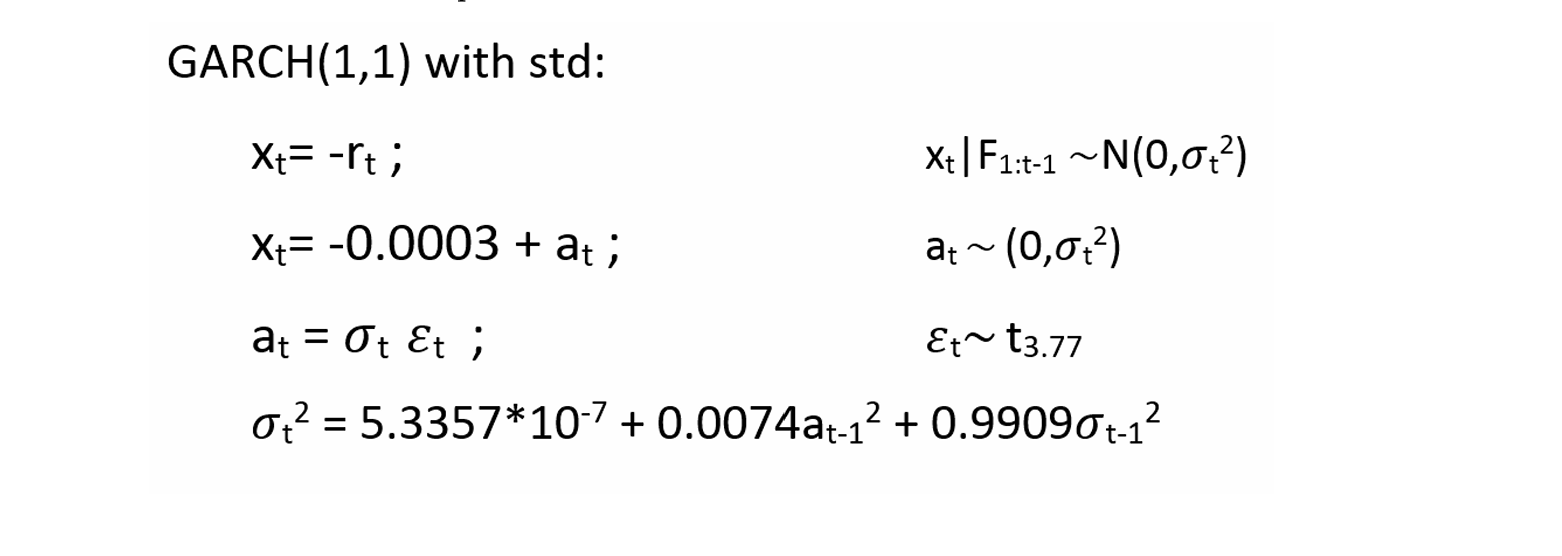

In [49]:
pm=predict(m4,1)
 pm

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
0.0003972363,0.02263884,0.02263884


In [50]:
 df=m4@fit$par[5]
 mu=pm[1,1]
 sigma=pm[1,3]
 source("RMeasure.R")
 RMeasure(mu,sigma,cond.dist="std",df=df)


 Risk Measures for selected probabilities: 
       prob        VaR         ES
[1,] 0.9500 0.03407079 0.05174559
[2,] 0.9900 0.06052576 0.08557193
[3,] 0.9990 0.11871606 0.16311111
[4,] 0.9999 0.22214171 0.30295625


 The VaR(at 99%) after considering short on Amazon & long on Coca-Cola (USD 1 Million each) for next day comes out to be 0.06052585 . This means the Value at Risk on position of Amazon + Coca-Cola Stocks worth USD 2 Million in total is 0.06052585 * 2,000,000 = USD 121,051

#### VaR for the combined position of AMZN and KO (both long), for the next trading day on April 30, 2015, if we entertain timevarying correlations between the two stocks.

In [51]:
getSymbols(Symbols = "AMZN", from = "2003-01-02", to = "2015-04-30")
 getSymbols(Symbols = "KO", from = "2003-01-02", to = "2015-04-30")

[1] "AMZN"

[1] "KO"

In [52]:
amzn = diff(log(AMZN$AMZN.Adjusted))
 ko = diff(log(KO$KO.Adjusted))
 amzn = c(amzn[-1,])
 ko = c(ko[-1,])

In [53]:
amzn = as.vector(amzn)
 ko = as.vector(ko)
 x =-amzn
 y =-ko
 head(x)
 head(y)

[1] -0.047402252 -0.008733625 -0.040242135  0.024901439 -0.020250272
[6]  0.006079051

[1]  0.002455737 -0.004015022  0.012545150  0.006558418 -0.010383652
[6] -0.014934167

In [54]:
 x_plus_y= x+y
 x_minus_y =x-y
 head(x_plus_y)
 head(x_minus_y)

[1] -0.044946516 -0.012748648 -0.027696986  0.031459857 -0.030633924
[6] -0.008855115

[1] -0.049857989 -0.004718603 -0.052787285  0.018343021 -0.009866620
[6]  0.021013218

In [57]:
source("Igarch.R")
mod5= Igarch(x_plus_y,volcnt= T) ##estimates constant as well.

Estimates:  1.877542e-06 0.9821552 
Maximized log-likehood:  -6426.238 

Coefficient(s):
         Estimate  Std. Error   t value   Pr(>|t|)    
omega 1.87754e-06 6.84743e-07   2.74197  0.0061073 ** 
beta  9.82155e-01 3.08326e-03 318.54432 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [58]:
da =as.data.frame(x_plus_y)
 da$var1= (mod5$volatility)^2
 head(da)

,x_plus_y,var1
,<dbl>,<dbl>
1,-0.044946516,0.001029444
2,-0.012748648,0.001049001
3,-0.027696986,0.001035060
4,0.031459857,0.001032156
5,-0.030633924,0.001033277
6,-0.008855115,0.001033462


In [59]:
 mod6= Igarch(x_minus_y,volcnt= T) 

Estimates:  4.734117e-05 0.8098558 
Maximized log-likehood:  -6945.78 

Coefficient(s):
         Estimate  Std. Error  t value   Pr(>|t|)    
omega 4.73412e-05 6.71709e-06  7.04787 1.8168e-12 ***
beta  8.09856e-01 1.98598e-02 40.77859 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [60]:
 da$x_minus_y =x_minus_y
 da$var2= (mod6$volatility)^2
 head(da)

,x_plus_y,var1,x_minus_y,var2
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.044946516,0.001029444,-0.049857989,0.0006996531
2,-0.012748648,0.001049001,-0.004718603,0.0010866234
3,-0.027696986,0.001035060,-0.052787285,0.0009315830
4,0.031459857,0.001032156,0.018343021,0.0013316255
5,-0.030633924,0.001033277,-0.009866620,0.0011897429
6,-0.008855115,0.001033462,0.021013218,0.0010293719


In [61]:
da$cov_x_y= 0.25*(da$var1-da$var2)
 head(da)

,x_plus_y,var1,x_minus_y,var2,cov_x_y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.044946516,0.001029444,-0.049857989,0.0006996531,8.244778e-05
2,-0.012748648,0.001049001,-0.004718603,0.0010866234,-9.405507e-06
3,-0.027696986,0.001035060,-0.052787285,0.0009315830,2.586925e-05
4,0.031459857,0.001032156,0.018343021,0.0013316255,-7.486729e-05
5,-0.030633924,0.001033277,-0.009866620,0.0011897429,-3.911656e-05
6,-0.008855115,0.001033462,0.021013218,0.0010293719,1.022475e-06


In [62]:
cor= da$cov_x_y/(mod5$volatility*mod6$volatility)
 head(cor)

A Time Series:
[1]  0.0971485165 -0.0088095684  0.0263445220 -0.0638599108 -0.0352797753
[6]  0.0009913321

In [64]:
 #VaR=sqrt(VaR_coke^2 +VaR_amz^2+2*cor[length(cor)]*VaR_coke*VaR_amz)
 VaR= sqrt(0.01848578^2 +0.06179496^2 +2*cor[length(cor)]* 0.01848578*0.06179496)
 VaR

[1] 0.05893627

In [65]:
print(paste("VaR=", VaR))

[1] "VaR= 0.0589362717795127"


#### 5- The goal is to study the daily log return and the volatility of Apple stock. Focus on the period from January 3, 2007 to April 30, 2015. You may download the daily open, high, low, close prices and related information from Yahoo via the quantmod package. The tick symbol is AAPL.Focus on the volatility of the daily log-returns. Use the data and n = 63 to compute the Yang and Zhang (2000) variance estimate 𝜎 of Section (3.15.2) of the textbook. Obtain a time plot of the annualized estimated volatility series. Build a linear time series model (ARMA) for the log-volatility series. Use the fitted model to produce 1-step to 5-step ahead forecasts of log-volatility at the forecast origin April 30, 2015. 

In [68]:
options(warn=-1)
#install.packages(c('fUnitRoots','TSA'))

library(quantmod,quietly = TRUE)
 library(TTR)
 library(fUnitRoots)
 library(TSA)

Installing package into 'C:/Users/array/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'leaps', 'locfit'




package 'leaps' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\array\AppData\Local\Temp\RtmpwTrSax\downloaded_packages



Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [69]:
getSymbols(Symbols = "AAPL", from = "2007-01-03", to = "2015-04-30")

[1] "AAPL"

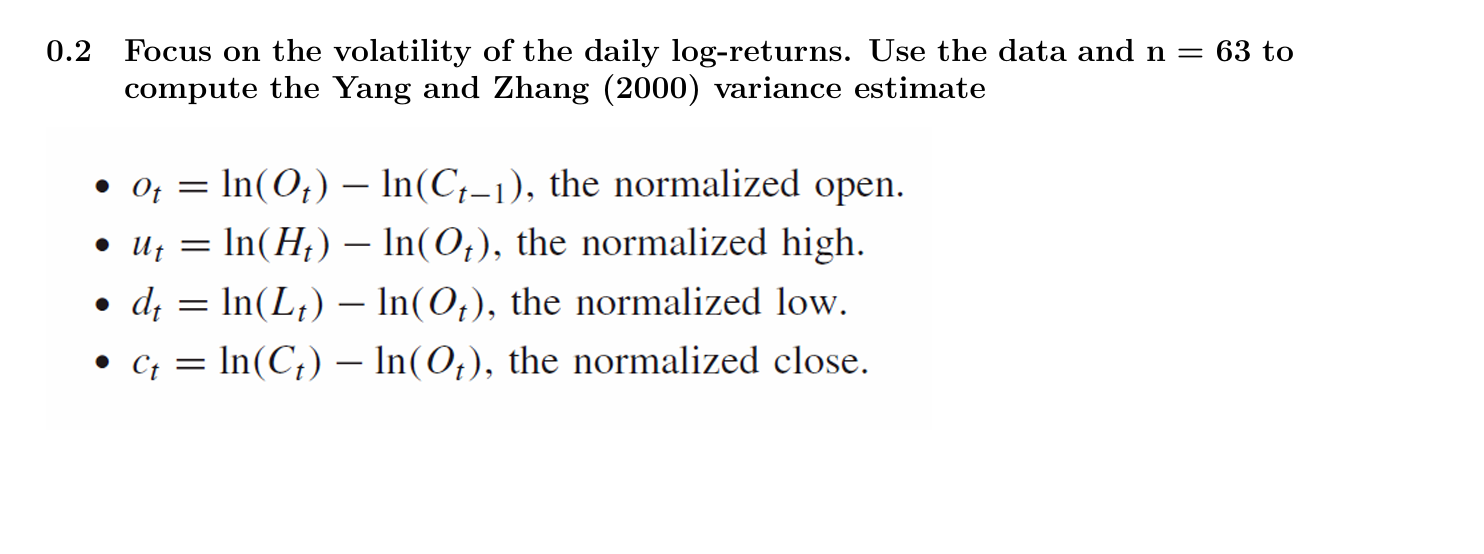

In [70]:
 a = AAPL
 a$AAPL.Volume = NULL
 a$AAPL.Adjusted = NULL
 names(a) = c("O","H","L","C")
 head(a)

                  O        H        L        C
2007-01-03 3.081786 3.092143 2.925000 2.992857
2007-01-04 3.001786 3.069643 2.993571 3.059286
2007-01-05 3.063214 3.078571 3.014286 3.037500
2007-01-08 3.070000 3.090357 3.045714 3.052500
2007-01-09 3.087500 3.320714 3.041071 3.306071
2007-01-10 3.383929 3.492857 3.337500 3.464286

In [71]:
ot = log(a$O[-1])- log(a$C)
 ut = log(a$H)- log(a$O)
 dt = log(a$L)- log(a$O)
 ct = log(a$C)- log(a$O)
 aa = cbind(ot,ut,dt,ct)
 names(aa) = c("ot","ut","dt","ct")
 head(aa)

                     ot          ut           dt           ct
2007-01-03           NA 0.003355125 -0.052214808 -0.029280830
2007-01-04 -0.018974151 0.022353832 -0.002740439  0.018974151
2007-01-05  0.008429935 0.005000842 -0.016101712 -0.008429935
2007-01-08  0.005716610 0.006609099 -0.007942216 -0.005716610
2007-01-09 -0.068398755 0.072818086 -0.015151997  0.068398755
2007-01-10 -0.023469112 0.031682555 -0.013815412  0.023469112

In [72]:
 sigma_yz_sq = xts(numeric(dim(aa)[1]),order.by = index(aa))
 head(sigma_yz_sq)

           [,1]
2007-01-03    0
2007-01-04    0
2007-01-05    0
2007-01-08    0
2007-01-09    0
2007-01-10    0

In [73]:
for (i in 3:dim(aa)[1]){
 if (i <= 63){
 aan = aa[1:i,]
 }else{
 aan = aa[(i-63):i,]
 }
 k = 0.34/ (1.34 + ((dim(aan)[1] + 1)/(dim(aan)[1]-1)))
 sigma_o_sq = var(aan$ot, na.rm = TRUE)
    sigma_c_sq= var(aan$ct,na.rm =TRUE)
 sigma_rs_sq= (1/dim(aan)[1] +1)* sum((aan$ut *(aan$ut-aan$ct)) +
 (aan$dt *(aan$dt-aan$ct)))
 sigma_yz_sq[i]= sigma_o_sq+k *sigma_c_sq+ (1-k)* sigma_rs_sq
 }
 head(sigma_yz_sq)

                  [,1]
2007-01-03 0.000000000
2007-01-04 0.000000000
2007-01-05 0.002390494
2007-01-08 0.002192204
2007-01-09 0.004941882
2007-01-10 0.005284144

#### Obtaining time plot of the annualized estimated volatility series.

                  [,1]
2007-01-03 0.002390494
2007-01-04 0.002390494
2007-01-05 0.002390494
2007-01-08 0.002192204
2007-01-09 0.004941882
2007-01-10 0.005284144

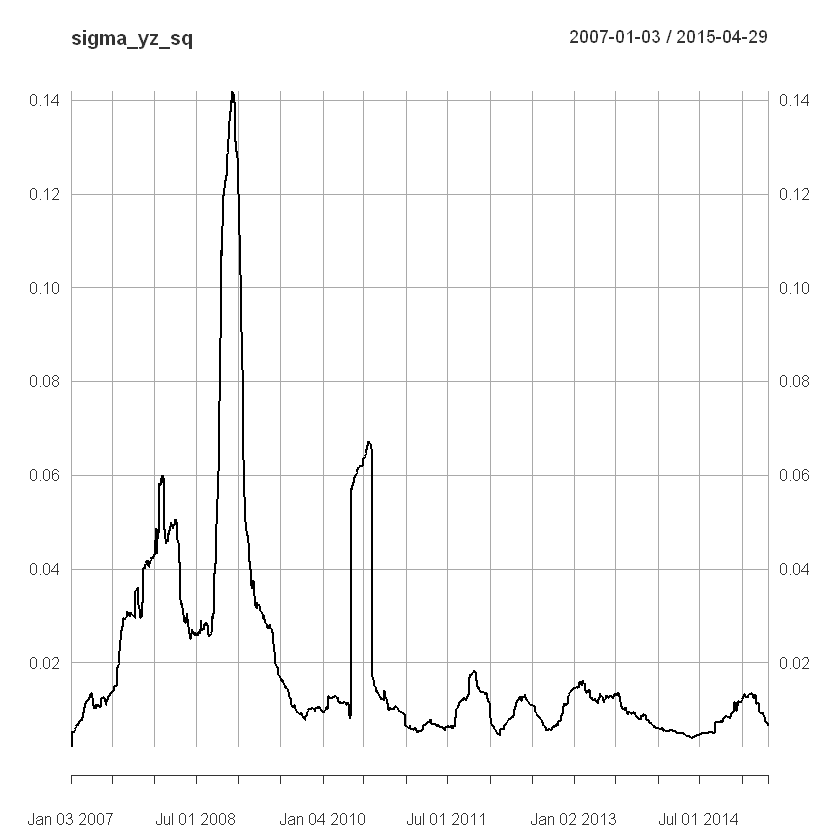

In [74]:
 sigma_yz_sq[1:2] =sigma_yz_sq[3]
 head(sigma_yz_sq)
 plot(sigma_yz_sq)

#### Building a linear time series model(ARMA) for the log-volatility series.

In [75]:
 logvol =diff(log(sigma_yz_sq))
 logvol =logvol[-1,]
 head(logvol)
 tail(logvol)

                  [,1]
2007-01-04  0.00000000
2007-01-05  0.00000000
2007-01-08 -0.08659275
2007-01-09  0.81283871
2007-01-10  0.06696442
2007-01-11 -0.01605103

                   [,1]
2015-04-22 -0.019035740
2015-04-23 -0.028147816
2015-04-24 -0.007308319
2015-04-27 -0.006956211
2015-04-28  0.029689173
2015-04-29  0.027601134

In [76]:
t.test(logvol)


	One Sample t-test

data:  logvol
t = 0.40516, df = 2093, p-value = 0.6854
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.002012049  0.003059914
sample estimates:
   mean of x 
0.0005239325 


 Mean of log Volatility series is zero

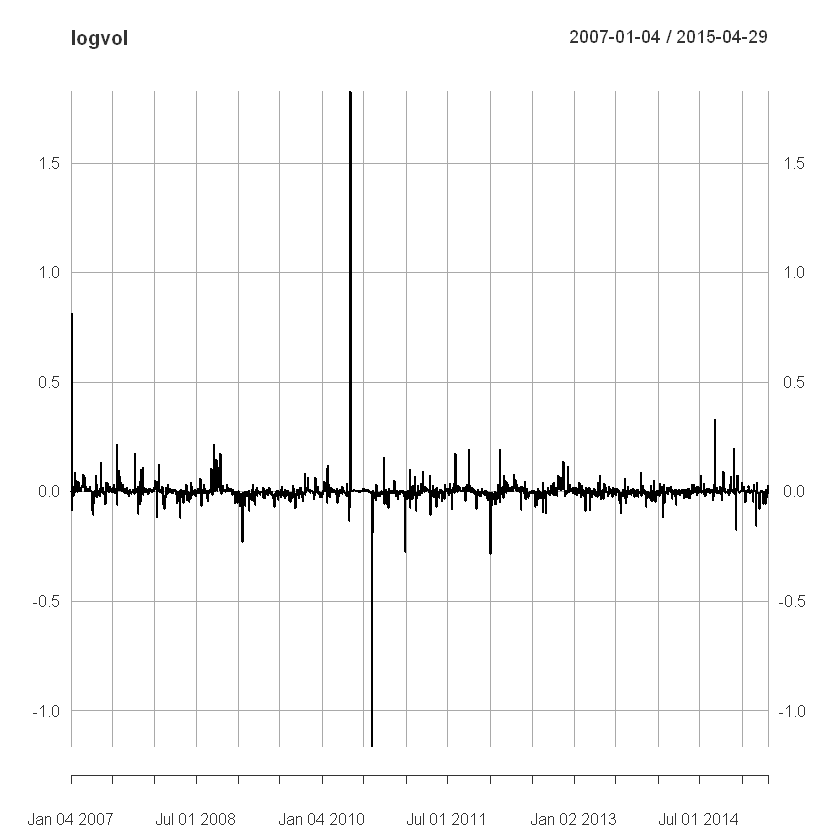

In [77]:
plot(logvol)

In [78]:
adfTest(logvol,lags = 10)


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -11.8346
  P VALUE:
    0.01 

Description:
 Mon Jun 23 21:18:38 2025 by user: array

 p<0.05 , We can reject Null Hypothesis. There is Auto-correlation in the series.

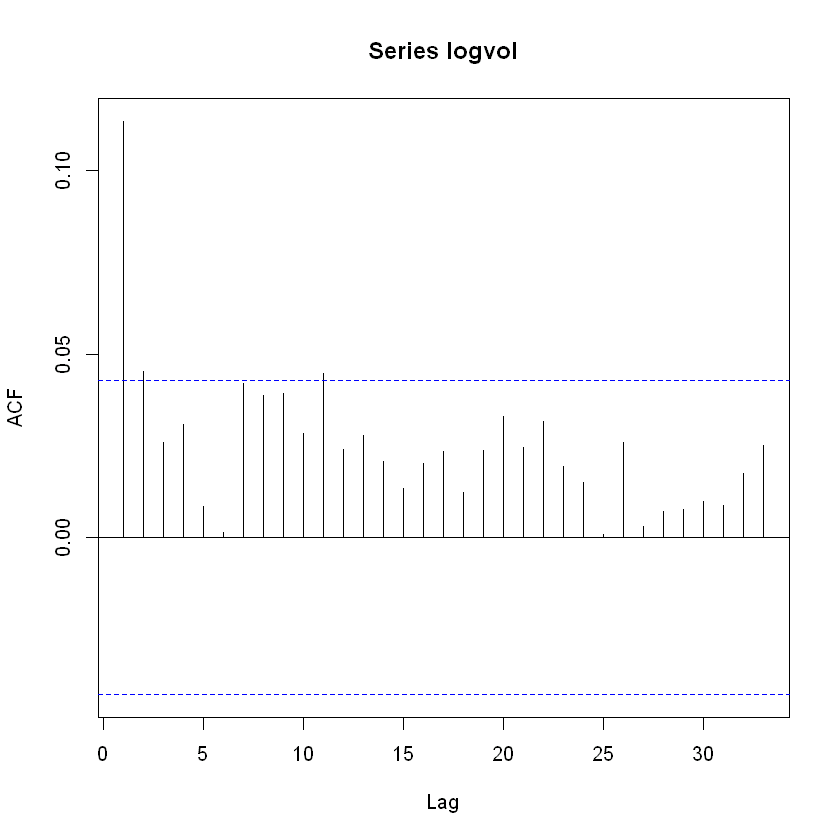

In [79]:
acf(logvol)

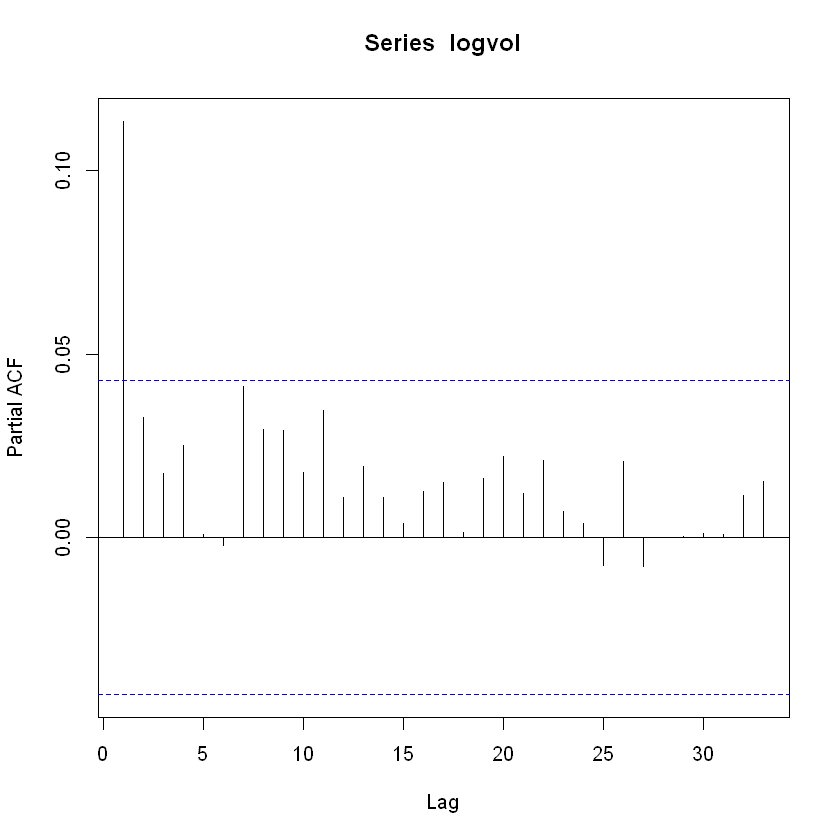

In [80]:
pacf(logvol)

There is significant spike at lag-1 in ACF & PACF graph. So, Fitting ARMA(1,1)

In [81]:
mod = arima(x = logvol,order = c(1,0,1),method = "ML",include.mean = FALSE)
 mod


Call:
arima(x = logvol, order = c(1, 0, 1), include.mean = FALSE, method = "ML")

Coefficients:
         ar1      ma1
      0.4821  -0.3762
s.e.  0.2002   0.2122

sigma^2 estimated as 0.00345:  log likelihood = 2964.7,  aic = -5925.4

#### Model Checking

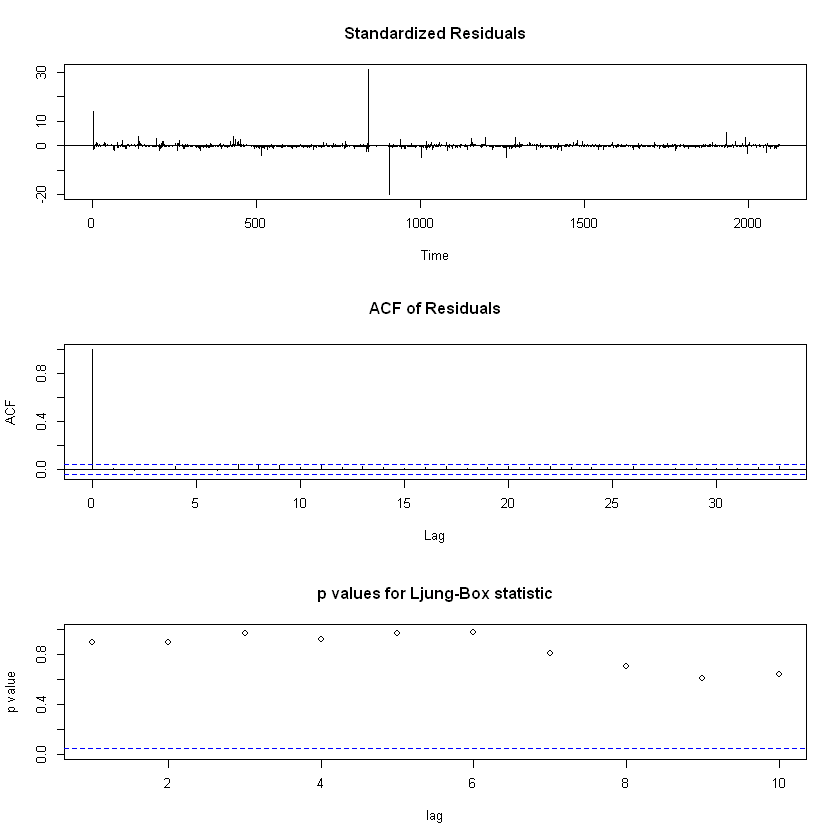

In [82]:
tsdiag(mod)

In [83]:
Box.test(mod$residuals,lag=15)


	Box-Pierce test

data:  mod$residuals
X-squared = 12.48, df = 15, p-value = 0.6424


Residuals are behaving like white noise so Model is adequate.

 #### Using the fitted model to produce 1-step to 5-step ahead forecasts of log-volatility at the forecast origin April 30, 2015.

In [84]:
 p = predict(mod,5)
 p

$pred
Time Series:
Start = 2095 
End = 2099 
Frequency = 1 
[1] 0.0038788349 0.0018700940 0.0009016243 0.0004346981 0.0002095800

$se
Time Series:
Start = 2095 
End = 2099 
Frequency = 1 
[1] 0.05873323 0.05906171 0.05913780 0.05915547 0.05915958